# Content Based Recommendation 

Kitapların açıklama bölümlerine göre tavsiye sistemi geliştireceğiz.

* TF-IDF Matrisinin Oluşturulması
* Cosine Similarity Matrisinin Oluşturulması
* Benzerliklerine göre önerilerin yapılması


### Importing Necessary Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

### Reading Datasets

In [2]:
df= pd.read_csv('df_final_21_09___9794.csv',index_col=0)
df

,book_id,book_title,book_series,title,book_authors,genres,book_score,book_rating,book_rating_obj,book_rating_count,book_review_count,book_desc,tags,FE_text,book_desc_tags_FE,...,book_edition,book_format,original_publication_year,language_code,book_pages,book_pages_obj,books_count,books_count_obj,goodreads_book_id,book_isbn,isbn,isbn13,image_url_x,image_url_y,small_image_url
0,1,The Hunger Games,"The Hunger Games, #1","The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult|Fiction|Science Fiction|Dystopia|F...,1.000000e+00,4.33,4.0,5519135,160706,Winning will make you famous. Losing means cer...,to-read fantasy favorites currently-reading yo...,The-Hunger-Games Suzanne-Collins Young-Adult F...,Winning will make you famous. Losing means cer...,...,NaN,Hardcover,2008.0,eng,374.0,8.0,272,14.0,2767052,9.780440e+12,439023483,9.780439e+12,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603l...,https://images.gr-assets.com/books/1447303603s...
1,2,Harry Potter and the Philosopher's Stone,"Harry Potter, #1",Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",NaN,8.245693e-01,4.44,4.0,6682936,108361,NaN,to-read fantasy favorites currently-reading yo...,Harry-Potter-and-the-Philosopher's-Stone J.K.-...,to-read fantasy favorites currently-reading y...,...,NaN,NaN,1997.0,eng,NaN,NaN,491,15.0,3,NaN,439554934,9.780440e+12,https://images.gr-assets.com/books/1474154022m...,NaN,https://images.gr-assets.com/books/1474154022s...
2,3,Twilight,"Twilight, #1","Twilight (Twilight, #1)",Stephenie Meyer,Young Adult|Fantasy|Romance|Paranormal|Vampire...,2.902011e-02,3.58,3.5,4281268,97991,About three things I was absolutely positive.F...,to-read fantasy favorites currently-reading yo...,Twilight Stephenie-Meyer Young-Adult Fantasy R...,About three things I was absolutely positive.F...,...,NaN,Paperback,2005.0,en-US,498.0,9.0,226,14.0,41865,9.780320e+12,316015849,9.780316e+12,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443l...,https://images.gr-assets.com/books/1361039443s...
3,4,To Kill a Mockingbird,-,To Kill a Mockingbird,Harper Lee,Classics|Fiction|Historical|Historical Fiction...,2.310594e-01,4.27,4.0,3745197,79450,The unforgettable novel of a childhood in a sl...,to-read favorites currently-reading young-adul...,To-Kill-a-Mockingbird Harper-Lee Classics Fict...,The unforgettable novel of a childhood in a sl...,...,50th Anniversary,Paperback,1960.0,eng,324.0,8.0,487,15.0,2657,9.780060e+12,61120081,9.780061e+12,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680l...,https://images.gr-assets.com/books/1361975680s...
4,5,The Great Gatsby,-,The Great Gatsby,F. Scott Fitzgerald,Classics|Fiction|Academic|School|Literature|Hi...,4.942671e-02,3.90,3.5,3141842,56953,Alternate Cover Edition ISBN: 0743273567 (ISBN...,to-read favorites currently-reading young-adul...,The-Great-Gatsby F.-Scott-Fitzgerald Classics ...,Alternate Cover Edition ISBN: 0743273567 (ISBN...,...,US / CAN,Paperback,1925.0,eng,180.0,5.0,1356,15.0,4671,NaN,743273567,9.780743e+12,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560l...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,9996,Bayou Moon,"The Edge, #2","Bayou Moon (The Edge, #2)",Ilona Andrews,Fantasy|Urban Fantasy|Fantasy|Romance|Fantasy|...,5.206229e-06,4.10,4.0,21145,1310,"The Edge lies between worlds, on the border be...",to-read fantasy favorites currently-reading fi...,Bayou-Moon Ilona-Andrews Fantasy Urban-Fantasy...,"The Edge lies between worlds, on the border be...",...,NaN,Mass Market Paperback,2010.0,eng,447.0,9.0,19,4.0,7130616,9.780440e+12,441019455,9.780441e+12,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460l...,https://

### Checking Book Description-Tag and Feature Text Columns

In [3]:
df["book_desc"].iloc[0]

"Winning will make you famous. Losing means certain death.The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory.When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for this their whole

In [4]:
df["tags"].iloc[0]

'to-read fantasy favorites currently-reading young-adult fiction books-i-own owned ya series favourites re-read adventure sci-fi-fantasy all-time-favorites default my-books reread i-own audiobook 5-stars favorite-books novels fantasy-sci-fi favorite audiobooks read-more-than-once my-library ya-fantasy teen english books ya-fiction my-favorites own-it library audio young-adult-fiction novel scifi-fantasy faves favorite-series shelfari-favorites kindle romance favourite to-buy read-in-2014 ebook contemporary 5-star coming-of-age favourite-books favs action read-in-2013 read-in-2011 finished ya-books borrowed sci-fi ya-lit loved love thriller science-fiction finished-series action-adventure scifi sf book-club speculative-fiction ebooks e-book read-in-2012 read-in-2010 survival future drama reviewed suspense dystopia dystopian post-apocalyptic read-2012 dystopias dystopian-fiction distopia distopian read-2011 teen-fiction 2012-reads futuristic ya-dystopian trilogy completed-series love-tri

In [5]:
df["FE_text"].iloc[0]

'The-Hunger-Games Suzanne-Collins Young-Adult Fiction Science-Fiction Dystopia Fantasy Science-Fiction eng'

In [6]:
df["book_desc_tags_FE"].iloc[0]

"Winning will make you famous. Losing means certain death.The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory.When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for this their whole

### 1. TF-IDF Matrisinin Oluşturulması

In [7]:
def book_desc_empty_fiil_mean(df,df2):
    df3=df[df["book_desc"]==""]

    if len(df3)>0:
        book_id_desc_empty=df3["book_id"].values
        book_id_desc_not_empty=df2[~(df2.columns.isin(df3["book_id"]))].index
        df2_not_empty=df2.loc[book_id_desc_not_empty,book_id_desc_not_empty]
        scores_mean=df2_not_empty.mean().mean()
        df2.iloc[:,:]=scores_mean
        df2.loc[book_id_desc_not_empty,book_id_desc_not_empty]=df2_not_empty
    return df2
    

In [8]:
def Content_Based_Recommendation(df,col):
    
    tfidf = TfidfVectorizer(stop_words="english")
    # TfidfVectorizer , dilde yaygınca kullanılan ve ölçüm değeri taşımayan ve yaygın kullanılan kelimeleri vs. siler
    df[col] = df[col].fillna('')
    tfidf_matrix = tfidf.fit_transform(df[col])
    
    cosine_sim = cosine_similarity(tfidf_matrix,
                                   tfidf_matrix)

    
    df2=pd.DataFrame(cosine_sim)
    df2.index=df['book_id']
    df2.columns=df['book_id']
    
    
    if col=="book_desc":
        df2=book_desc_empty_fiil_mean(df,df2)
    
    
    return df2

### 2. Cosine Similarity Matrisinin Oluşturulması

In [9]:
def similarity_scores_(df2,book_id):
    similarity_scores=df2[book_id]
    similarity_scores=pd.DataFrame(similarity_scores)
    similarity_scores.columns=["score"]
    similarity_scores=similarity_scores.sort_values("score", ascending=False)
    return similarity_scores
#similarity_scores=similarity_scores_(df2,book_id)

## 3. Kitap Tavsiye Sistemi Fonksiyon Oluşturulması

In [219]:
def Recommended_book(similarity_scores,df):
    Recommended_book_ids = similarity_scores.index

    df_Recommended=df[["book_id","book_title","book_series","book_authors","genres"]]
    df_Recommended.index=df_Recommended["book_id"]
    df_Recommended=df_Recommended.loc[Recommended_book_ids]


    return df_Recommended

## 4. Benzerliklere Göre Önerilerin Yapılması

Öncelikle 6 nolu "book_id" olan 'The Fault in Our Stars' kitabını seçiyoruz.

In [170]:
book_id = 6
book_title=df[df["book_id"]==book_id]["book_title"].values[0]
book_title

'The Fault in Our Stars'

### 4.1.Kitap Tanımına Göre İçerik Tabanlı Tavsiye Sistemi 

In [216]:
book_desc=df[df["book_id"]==book_id]["book_desc"].values[0]
book_desc

"Despite the tumor-shrinking medical miracle that has bought her a few years, Hazel has never been anything but terminal, her final chapter inscribed upon diagnosis. But when a gorgeous plot twist named Augustus Waters suddenly appears at Cancer Kid Support Group, Hazel's story is about to be completely rewritten.Insightful, bold, irreverent, and raw, The Fault in Our Stars is award-winning author John Green's most ambitious and heartbreaking work yet, brilliantly exploring the funny, thrilling, and tragic business of being alive and in love."

In [217]:
df_cbr_desc=Content_Based_Recommendation(df,"book_desc")
df_cbr_desc

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.012948,0.006588,0.020210,0.010776,0.007180,0.000000,0.014566,0.012948,0.005591,0.012948,0.026272,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.010872,0.013015,0.000000,0.012948,0.012948,0.007421,0.009831,0.012948,0.000000,0.035196,0.012948
2,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948
3,0.006588,0.012948,1.000000,0.038431,0.024484,0.021557,0.000000,0.012905,0.012948,0.011319,0.012948,0.000000,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.012496,0.004074,0.000000,0.012948,0.012948,0.000000,0.000000,0.012948,0.000000,0.004379,0.012948
4,0.020210,0.012948,0.038431,1.000000,0.058509,0.036908,0.000000,0.036352,0.012948,0.008973,0.012948,0.000000,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.055329,0.032794,0.005491,0.012948,0.012948,0.010746,0.000000,0.012948,0.003439,0.017086,0.012948
5,0.010776,0.012948,0.024484,0.058509,1.000000,0.028029,0.000000,0.042746,0.012948,0.000000,0.012948,0.000000,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.000000,0.021526,0.000000,0.012948,0.012948,0.013187,0.007383,0.012948,0.007878,0.011651,0.012948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.009831,0.012948,0.000000,0.000000,0.007383,0.004733,0.014664,0.001679,0.012948,0.001965,0.012948,0.008026,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.000000,0.023490,0.009232,0.012948,0.012948,0.000000,1.000000,0.012948,0.000000,0.008280,0.012948
9997,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948,0.012948
9998,0.000000,0.012948,0.000000,0.003439,0.007878,0.000000,0.000000,0.062902,0.012948,0.005747,0.012948,0.006506,0.012948,0.012948,0.012948,...,0.012948,0.012948,0.012948,0.012948,0.000000,0.000000,0.008966,0.012948,0.012948,0.048970,0.000000,0.012948,1.000000,0.000000,0.012948


In [231]:
similarity_scores_desc=similarity_scores_(df_cbr_desc,book_id)
df_Recommended_desc=Recommended_book(similarity_scores_desc,df)
df_Recommended_desc["similarity_scores_desc"] = similarity_scores_desc
df_Recommended_desc.iloc[:15]


,book_id,book_title,book_series,book_authors,genres,similarity_scores_desc
book_id,,,,,,
6,6,The Fault in Our Stars,-,John Green,Young Adult|Fiction|Romance|Contemporary,1.000000
5645,5645,The Darkest Part of the Forest,-,Holly Black,Fantasy|Young Adult|Romance|Fantasy|Paranormal...,0.189001
4942,4942,Wise Blood,-,Flannery O'Connor,Fiction|Classics|Gothic|Southern Gothic|Litera...,0.138190
1851,1851,The Emperor of All Maladies: A Biography of Ca...,-,Siddhartha Mukherjee,Nonfiction|Science|History|Health|Medicine|Med...,0.087377
9360,9360,"The Green Mile, Part 6: Coffey on the Mile",-,Stephen King,Horror|Fiction|Thriller,0.085690
4237,4237,The Magician's Assistant,-,Ann Patchett,Fiction|Literary Fiction|Contemporary,0.079404
8881,8881,Benediction,"Plainsong, #3",Kent Haruf,Fiction|Literary Fiction|Family,0.077496
684,684,The House of Hades,"The Heroes of Olympus, #4",Rick Riordan,Fantasy|Young Adult|Fantasy|Mythology,0.076032
5349,5349,Autobiography of a Face,-,Lucy Grealy,Autobiography|Memoir|Nonfiction|Biography|Biog...,0.075946


In [224]:
df_Recommended_desc["similarity_scores"] = similarity_scores_desc

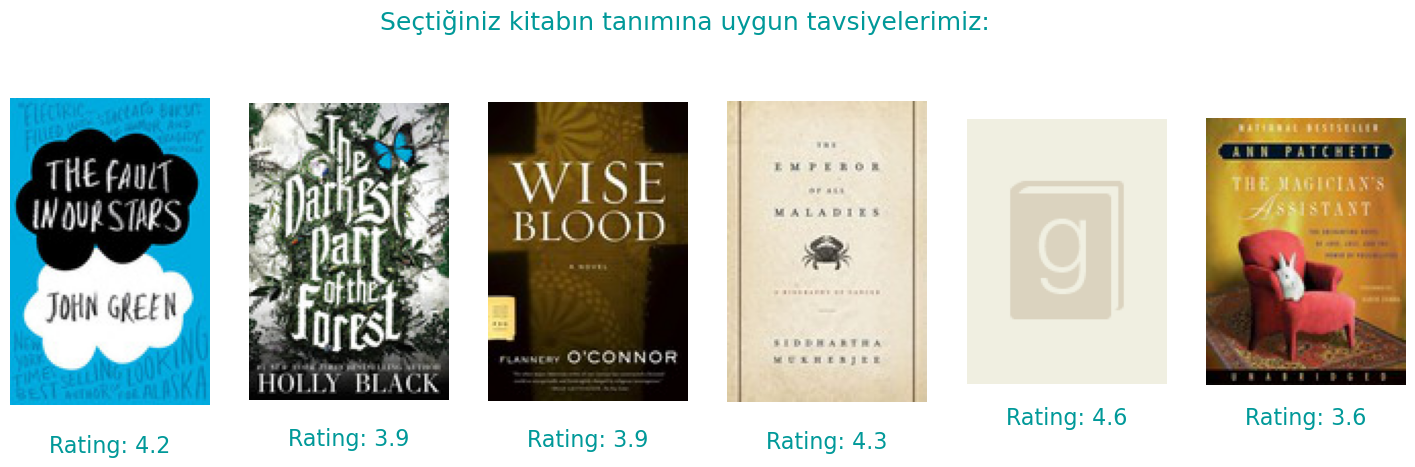

In [190]:
import matplotlib.pyplot as plt
from PIL import Image
import requests


fig, axs = plt.subplots(1, 6,figsize=(18,5))
fig.suptitle('Seçtiğiniz kitabın tanımına uygun tavsiyelerimiz:', color= "#009999",size = 18)
for i in range(6):
        
                url = df.loc[df['book_title'] == df_Recommended_desc['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == df_Recommended_desc['book_title'].tolist()[i]]['book_rating'].mean(),1)),
                             y=-0.18,
                                 color="#009999",
                                 fontsize=16)
fig.show()

### 4.2.Kitap Etiketine Göre İçerik Tabanlı Tavsiye Sistemi 


In [227]:
df_cbr_tags=Content_Based_Recommendation(df,"tags")
df_cbr_tags

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.389934,0.407963,0.235655,0.235865,0.431560,0.365496,0.239725,0.208115,0.255144,0.252864,0.741340,0.386204,0.279587,0.114358,...,0.158542,0.089946,0.055793,0.207139,0.048974,0.068238,0.320740,0.125318,0.198154,0.106509,0.266535,0.052284,0.090858,0.161231,0.036021
2,0.389934,1.000000,0.371772,0.304138,0.288895,0.376708,0.523355,0.282664,0.183501,0.335649,0.268150,0.455735,0.363846,0.316044,0.220782,...,0.113811,0.074127,0.068619,0.210016,0.047627,0.075482,0.377091,0.151983,0.384081,0.141136,0.314423,0.066896,0.089267,0.167363,0.046375
3,0.407963,0.371772,1.000000,0.196617,0.222692,0.321869,0.340409,0.204386,0.155345,0.206784,0.182224,0.440643,0.251725,0.227317,0.105867,...,0.096939,0.057665,0.041500,0.253356,0.053518,0.054806,0.343543,0.086105,0.194712,0.103489,0.345341,0.055167,0.059337,0.090523,0.028876
4,0.235655,0.304138,0.196617,1.000000,0.833475,0.334487,0.394448,0.822574,0.230897,0.684811,0.530810,0.285794,0.646940,0.691848,0.458691,...,0.113438,0.070164,0.101570,0.119674,0.344672,0.142731,0.158637,0.199337,0.161781,0.568872,0.129886,0.123095,0.120341,0.180313,0.104864
5,0.235865,0.288895,0.222692,0.833475,1.000000,0.352749,0.410143,0.871047,0.201017,0.721786,0.543156,0.309173,0.676991,0.734540,0.459325,...,0.115507,0.070912,0.114688,0.137252,0.135248,0.113560,0.189038,0.183472,0.152128,0.610718,0.148523,0.110995,0.119018,0.217576,0.073465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.266535,0.314423,0.345341,0.129886,0.148523,0.171878,0.309613,0.122344,0.125688,0.138213,0.132099,0.288499,0.220834,0.173146,0.055710,...,0.082088,0.064394,0.039920,0.304663,0.024151,0.047166,0.387008,0.092507,0.186126,0.066516,1.000000,0.037222,0.053729,0.108665,0.026036
9997,0.052284,0.066896,0.055167,0.123095,0.110995,0.064451,0.056257,0.100887,0.074986,0.092677,0.097351,0.065085,0.089653,0.113814,0.270790,...,0.042297,0.024252,0.180062,0.036199,0.037337,0.028340,0.062406,0.383369,0.037513,0.108535,0.037222,1.000000,0.050225,0.115507,0.358835
9998,0.090858,0.089267,0.059337,0.120341,0.119018,0.093792,0.085617,0.102358,0.096111,0.151068,0.136282,0.097870,0.098984,0.116065,0.082384,...,0.052284,0.028281,0.023293,0.040865,0.036634,0.038973,0.106088,0.119502,0.053154,0.176101,0.053729,0.050225,1.000000,0.054261,0.124174


In [230]:
similarity_scores_tag=similarity_scores_(df_cbr_tags,book_id)
df_Recommended_tag=Recommended_book(similarity_scores_tag,df)
df_Recommended_tag["similarity_scores_tag"] = similarity_scores_tag
df_Recommended_tag.iloc[:15]

,book_id,book_title,book_series,book_authors,genres,similarity_scores_tag
book_id,,,,,,
6,6,The Fault in Our Stars,-,John Green,Young Adult|Fiction|Romance|Contemporary,1.000000
475,475,Where She Went,"If I Stay, #2",Gayle Forman,Young Adult|Romance|Contemporary|Fiction|Reali...,0.703931
2454,2454,Before I Die,-,Jenny Downham,Young Adult|Romance|Fiction|Realistic Fiction|...,0.691048
3655,3655,Second Chance Summer,-,Morgan Matson,NaN,0.686283
149,149,If I Stay,"If I Stay, #1",Gayle Forman,Young Adult|Romance|Contemporary|Fiction,0.686052
363,363,Anna and the French Kiss,"Anna and the French Kiss, #1",Stephanie Perkins,Young Adult|Romance|Contemporary|Womens Fictio...,0.676343
324,324,Fangirl,-,Rainbow Rowell,Young Adult|Contemporary|Romance|Fiction,0.667062
74,74,Looking for Alaska,-,John Green,Young Adult|Fiction|Contemporary|Romance,0.666568
164,164,Eleanor & Park,-,Rainbow Rowell,Young Adult|Romance|Contemporary|Fiction,0.651970


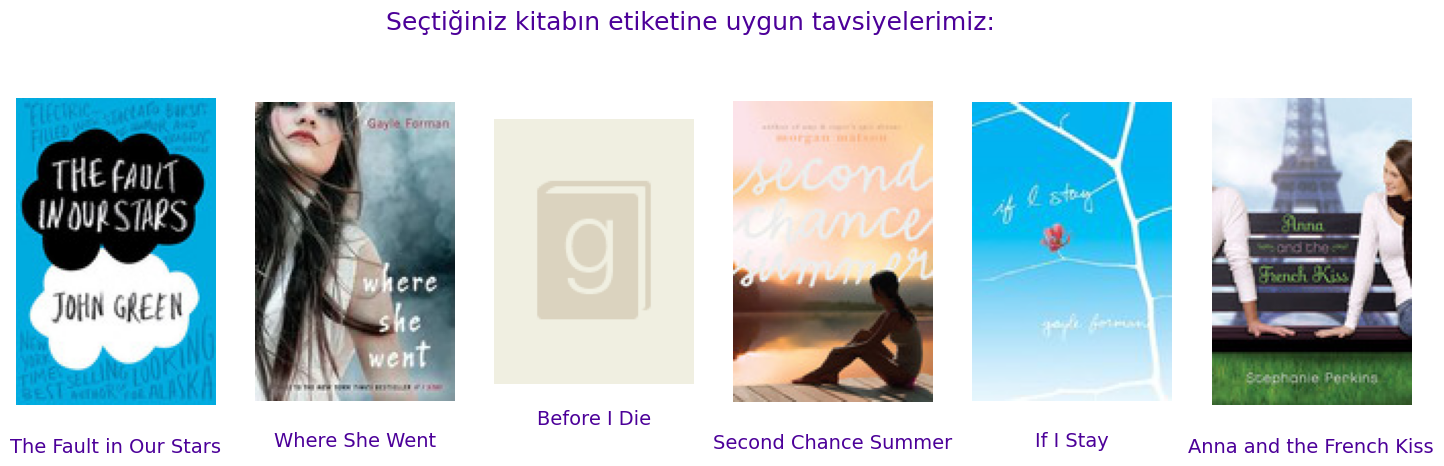

In [229]:
import matplotlib.pyplot as plt
from PIL import Image
import requests


fig, axs = plt.subplots(1, 6,figsize=(18,5))
fig.suptitle('Seçtiğiniz kitabın etiketine uygun tavsiyelerimiz:', color="#4C0099",size = 18)
for i in range(6):
        
                url = df.loc[df['book_title'] == df_Recommended_tag['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('{}'.format(df_Recommended_tag['book_title'].tolist()[i]), y=-0.18,color="#4C0099",fontsize=14)
               
            

fig.show()

### 4.3.Kitap Özel İçerik Tanımı(Başlık-Yazar-Kategori-Dil) Göre İçerik Tabanlı Tavsiye Sistemi 

In [232]:
df_cbr_FE=Content_Based_Recommendation(df,"FE_text")
df_cbr_FE

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.005822,0.140205,0.069698,0.072743,0.105587,0.248819,0.095939,0.000000,0.044680,0.006284,0.336619,0.004591,0.006465,0.003486,...,0.0,0.00000,0.007414,0.008864,0.033223,0.045055,0.137623,0.004159,0.005483,0.057272,0.093895,0.006884,0.068737,0.003541,0.0
2,0.005822,1.000000,0.000000,0.005496,0.003418,0.006828,0.000000,0.006204,0.000000,0.006511,0.006027,0.006772,0.004404,0.006201,0.003344,...,0.0,0.00000,0.007112,0.008502,0.004841,0.004104,0.004362,0.003989,0.005259,0.004516,0.004344,0.006603,0.005420,0.003397,0.0
3,0.140205,0.000000,1.000000,0.022669,0.061030,0.107843,0.298913,0.069527,0.022997,0.043297,0.000000,0.149103,0.000000,0.000000,0.000000,...,0.0,0.02215,0.000000,0.000000,0.009985,0.044374,0.237969,0.000000,0.000000,0.018627,0.387679,0.000000,0.022356,0.000000,0.0
4,0.069698,0.005496,0.022669,1.000000,0.416578,0.031725,0.063869,0.074691,0.000000,0.078383,0.005931,0.056264,0.004333,0.006102,0.003290,...,0.0,0.00000,0.006998,0.008367,0.022493,0.019070,0.020267,0.003926,0.005175,0.177955,0.004274,0.006497,0.237752,0.003342,0.0
5,0.072743,0.003418,0.061030,0.416578,1.000000,0.071500,0.127954,0.149463,0.000000,0.065240,0.003689,0.069183,0.002695,0.003795,0.002046,...,0.0,0.00000,0.004352,0.005203,0.013989,0.011860,0.049929,0.002442,0.003218,0.248873,0.035668,0.004041,0.147861,0.002079,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.093895,0.004344,0.387679,0.004274,0.035668,0.071257,0.399657,0.004826,0.000000,0.067946,0.004688,0.109208,0.003425,0.004823,0.002601,...,0.0,0.00000,0.005531,0.006613,0.003765,0.066190,0.405096,0.003103,0.004090,0.003512,1.000000,0.005136,0.004215,0.002642,0.0
9997,0.006884,0.006603,0.000000,0.006497,0.004041,0.008073,0.000000,0.007335,0.000000,0.007698,0.007126,0.008006,0.005206,0.007332,0.003953,...,0.0,0.00000,0.008408,0.010052,0.005724,0.004853,0.005157,0.004717,0.006218,0.005339,0.005136,1.000000,0.006408,0.004016,0.0
9998,0.068737,0.005420,0.022356,0.237752,0.147861,0.031287,0.078065,0.028428,0.000000,0.029833,0.005849,0.055488,0.004274,0.006018,0.003245,...,0.0,0.00000,0.006902,0.008251,0.022183,0.018807,0.019987,0.003872,0.005104,0.195364,0.004215,0.006408,1.000000,0.003296,0.0


In [233]:
similarity_scores_fe=similarity_scores_(df_cbr_FE,book_id)
df_Recommended_FE=Recommended_book(similarity_scores_fe,df)
df_Recommended_FE["similarity_scores_fe"] = similarity_scores_fe
df_Recommended_FE.iloc[:15]

,book_id,book_title,book_series,book_authors,genres,similarity_scores_fe
book_id,,,,,,
6,6,The Fault in Our Stars,-,John Green,Young Adult|Fiction|Romance|Contemporary,1.000000
74,74,Looking for Alaska,-,John Green,Young Adult|Fiction|Contemporary|Romance,0.400387
88,88,Paper Towns,-,John Green,Young Adult|Contemporary|Fiction|Romance,0.394260
275,275,An Abundance of Katherines,-,John Green,Young Adult|Contemporary|Fiction|Romance,0.391549
9538,9538,Agent to the stars,-,John Scalzi,NaN,0.340744
5118,5118,Stars Above,"The Lunar Chronicles, #4.5",Marissa Meyer,Young Adult|Fantasy|Science Fiction|Short Stories,0.308685
5073,5073,The City and the Stars,-,Arthur C. Clarke,Science Fiction|Fiction,0.285711
1066,1066,The Summer I Turned Pretty,"Summer, #1",Jenny Han,Young Adult|Romance|Contemporary|Womens Fictio...,0.284137
3566,3566,Black Swan Green,-,David Mitchell,Fiction|Young Adult|Coming Of Age|Contemporary...,0.279031


Bu özel tavsiye sistemine göre farklı kitap başlıkları "Lies","Light" ve "Golden Son"

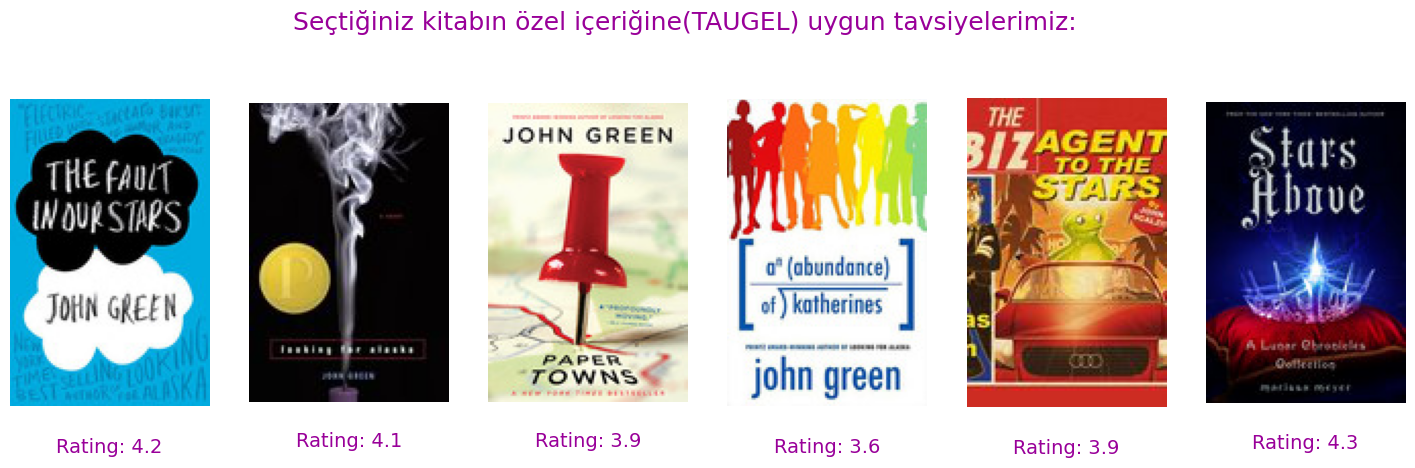

In [195]:
import matplotlib.pyplot as plt
from PIL import Image
import requests


fig, axs = plt.subplots(1, 6,figsize=(18,5))
fig.suptitle('Seçtiğiniz kitabın özel içeriğine(TAUGEL) uygun tavsiyelerimiz:',color="#990099",size = 18)
for i in range(6):
        
                url = df.loc[df['book_title'] == df_Recommended_FE['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == df_Recommended_FE['book_title'].tolist()[i]]['book_rating'].mean(),1)),
                             y=-0.18,
                                 color="#990099",
                                 fontsize=14)
fig.show()

### 4.4.Kitap Özeti - Etiket ve Özel İçerik Tanımı(Başlık-Yazar-Kategori-Dil) Göre İçerik Tabanlı Tavsiye Sistemi 

Tavsiye sistemimizi uygularken bu kez kitabın özeti,etiketi ve özel tanımlı içerik kısmımızı da dahil ederek oluşturuyoruz.

In [234]:
df_cbr_BDFE=Content_Based_Recommendation(df,"book_desc_tags_FE")
df_cbr_BDFE

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.169023,0.148136,0.085288,0.075704,0.145228,0.131329,0.079058,0.101128,0.080507,0.112568,0.209858,0.171429,0.134367,0.052822,...,0.081204,0.041909,0.033458,0.099218,0.031791,0.036793,0.125792,0.082314,0.100227,0.053891,0.098636,0.042886,0.035369,0.067548,0.035567
2,0.169023,1.000000,0.222234,0.162467,0.139525,0.201955,0.296182,0.147687,0.145545,0.174078,0.195932,0.196200,0.270224,0.248479,0.159622,...,0.090273,0.061556,0.059039,0.174192,0.039343,0.064460,0.245869,0.128664,0.294569,0.111042,0.193386,0.058315,0.055558,0.077491,0.040308
3,0.148136,0.222234,1.000000,0.092496,0.092030,0.149047,0.175942,0.083785,0.099647,0.089738,0.105237,0.153874,0.149817,0.141956,0.062014,...,0.060194,0.039633,0.026849,0.182592,0.040098,0.036359,0.197176,0.056593,0.125986,0.064667,0.196204,0.035674,0.030756,0.035109,0.019439
4,0.085288,0.162467,0.092496,1.000000,0.333277,0.146852,0.147835,0.296985,0.138706,0.264989,0.281274,0.087624,0.341876,0.398018,0.260321,...,0.070907,0.039899,0.064258,0.070144,0.274891,0.097046,0.069369,0.118802,0.095685,0.333162,0.045830,0.076825,0.069006,0.068879,0.063945
5,0.075704,0.139525,0.092030,0.333277,1.000000,0.137485,0.145880,0.302864,0.116574,0.259544,0.276469,0.086836,0.336829,0.397651,0.255455,...,0.059694,0.037074,0.069795,0.074678,0.091261,0.073588,0.076309,0.109154,0.084316,0.337725,0.054910,0.065652,0.067386,0.074917,0.049695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.098636,0.193386,0.196204,0.045830,0.054910,0.077859,0.179758,0.041397,0.075010,0.057172,0.069669,0.107141,0.130140,0.104537,0.034007,...,0.046107,0.039842,0.033558,0.201862,0.013681,0.040100,0.238268,0.056450,0.137081,0.034622,1.000000,0.028293,0.024783,0.041259,0.030902
9997,0.042886,0.058315,0.035674,0.076825,0.065652,0.042010,0.034514,0.058943,0.073943,0.056057,0.082692,0.032849,0.077564,0.103431,0.237070,...,0.038276,0.023596,0.170273,0.035532,0.034931,0.029925,0.042479,0.353234,0.036312,0.098593,0.028293,1.000000,0.039116,0.067201,0.350568
9998,0.035369,0.055558,0.030756,0.069006,0.067386,0.043457,0.044171,0.060467,0.071349,0.072856,0.091013,0.039228,0.072882,0.092056,0.057322,...,0.036551,0.019659,0.016766,0.027586,0.029567,0.025399,0.057759,0.088694,0.037842,0.129313,0.024783,0.039116,1.000000,0.021284,0.089280


In [235]:
similarity_scores_bdfe=similarity_scores_(df_cbr_BDFE,book_id)
df_Recommended_BDFE=Recommended_book(similarity_scores_bdfe,df)
df_Recommended_BDFE["similarity_scores_bdfe"] = similarity_scores_bdfe
df_Recommended_BDFE.iloc[:15]

,book_id,book_title,book_series,book_authors,genres,similarity_scores_bdfe
book_id,,,,,,
6,6,The Fault in Our Stars,-,John Green,Young Adult|Fiction|Romance|Contemporary,1.000000
3655,3655,Second Chance Summer,-,Morgan Matson,NaN,0.417070
1575,1575,Let It Snow: Three Holiday Romances,-,"John Green, Maureen Johnson, Lauren Myracle",NaN,0.410122
1080,1080,My Life Next Door,-,Huntley Fitzpatrick,NaN,0.386222
382,382,"Will Grayson, Will Grayson",-,"John Green, David Levithan",NaN,0.385778
7678,7678,Promises to Keep,-,Jane Green,NaN,0.369174
921,921,All the Bright Places,-,"Jennifer Niven, فرانک معنوی",NaN,0.366974
1284,1284,It's Not Summer Without You,"Summer, #2",Jenny Han,NaN,0.357447
2699,2699,Flat-Out Love,"Flat-Out Love, #1",Jessica Park,NaN,0.354657


Bu özel tavsiye sistemine göre farklı kitap başlığı "The Uglies Trilogy"

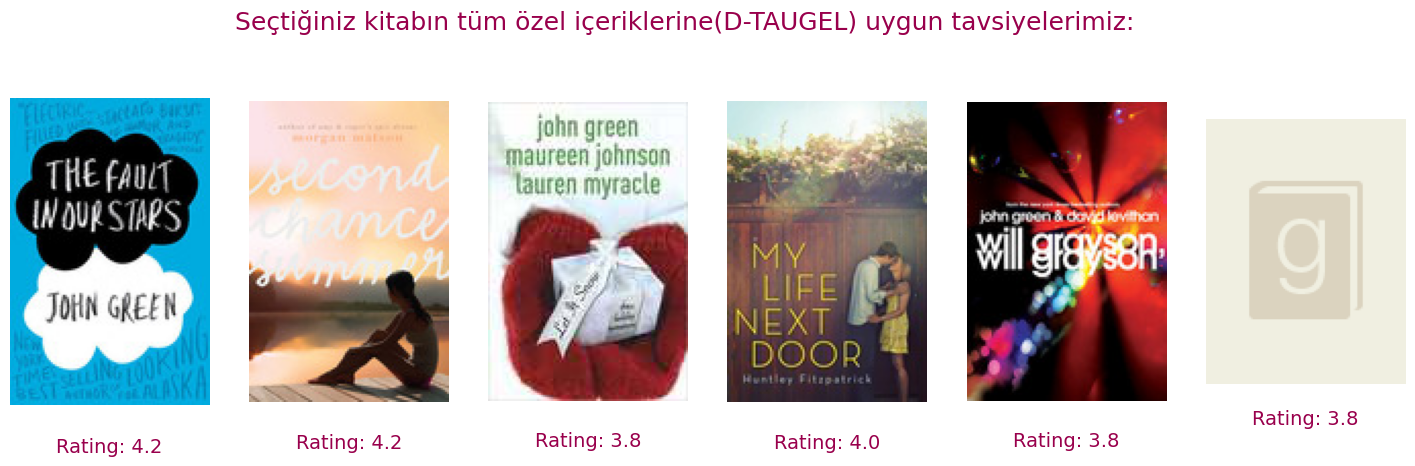

In [236]:
import matplotlib.pyplot as plt
from PIL import Image
import requests


fig, axs = plt.subplots(1, 6,figsize=(18,5))
fig.suptitle('Seçtiğiniz kitabın tüm özel içeriklerine(D-TAUGEL) uygun tavsiyelerimiz:', color="#99004C",size = 18)
for i in range(6):
        
                url = df.loc[df['book_title'] == df_Recommended_BDFE['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == df_Recommended_BDFE['book_title'].tolist()[i]]['book_rating'].mean(),1)),
                             y=-0.18,
                                 color="#99004C",
                                 fontsize=14)
fig.show()

### 4.5. Ağırlıklandırma Yöntemli Özel Uygulamalı Kitap İçeriğine Göre Tavsiye Sistemi 


Tüm içerik tabanlı modelleri bir araya getirip yeni ve en iyi içerik tabanlı tavsiye sistemi elde ettik.

In [186]:
df_cbr_all=( df_cbr_desc*0.4+df_cbr_tags*0.4+df_cbr_BDFE*0.1+df_cbr_FE*0.1)
df_cbr_all

book_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
book_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.178637,0.194655,0.117845,0.113501,0.200578,0.184213,0.119216,0.098538,0.116813,0.118210,0.361693,0.177263,0.131097,0.056553,...,0.076716,0.045349,0.031584,0.098843,0.030440,0.040686,0.154638,0.063953,0.095012,0.056688,0.129800,0.031070,0.046754,0.085680,0.023144
2,0.178637,0.605179,0.176111,0.143630,0.135031,0.176740,0.244139,0.133634,0.093134,0.157497,0.132635,0.207770,0.178180,0.157065,0.109788,...,0.059731,0.040985,0.039242,0.107455,0.028648,0.042228,0.181038,0.079238,0.188794,0.073189,0.150721,0.038429,0.046983,0.080213,0.027760
3,0.194655,0.176111,1.000000,0.105536,0.114177,0.163059,0.183649,0.102247,0.079581,0.100545,0.088592,0.206555,0.120851,0.110302,0.053727,...,0.049974,0.034423,0.024464,0.124781,0.031414,0.031625,0.180932,0.045280,0.095662,0.049725,0.196525,0.030813,0.029046,0.041472,0.018673
4,0.117845,0.143630,0.105536,1.000000,0.431779,0.166416,0.178950,0.380738,0.111409,0.311851,0.246223,0.128706,0.298576,0.322330,0.215016,...,0.057645,0.037234,0.052932,0.060900,0.189739,0.081822,0.074615,0.097187,0.079978,0.282959,0.056965,0.062749,0.080188,0.086182,0.053519
5,0.113501,0.135031,0.114177,0.431779,1.000000,0.173210,0.191441,0.410750,0.097243,0.321193,0.250457,0.139271,0.309928,0.339140,0.214659,...,0.057351,0.037251,0.058469,0.068068,0.064624,0.062579,0.088239,0.089727,0.074784,0.308222,0.071420,0.056546,0.072283,0.099390,0.039535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.129800,0.150721,0.196525,0.056965,0.071420,0.085556,0.187652,0.054231,0.062955,0.068583,0.065454,0.140245,0.106869,0.085374,0.031124,...,0.042625,0.034921,0.025056,0.147892,0.011405,0.038891,0.222832,0.048137,0.093746,0.030420,1.000000,0.023410,0.024391,0.051168,0.018684
9997,0.031070,0.038429,0.030813,0.062749,0.056546,0.035968,0.031133,0.052162,0.042568,0.048625,0.053101,0.035299,0.049317,0.061781,0.137597,...,0.025926,0.017240,0.095072,0.024217,0.024179,0.019993,0.034905,0.194322,0.024437,0.058986,0.023410,0.605179,0.029822,0.058503,0.183770
9998,0.046754,0.046983,0.029046,0.080188,0.072283,0.044991,0.046470,0.074994,0.050758,0.072995,0.069378,0.051222,0.052488,0.061413,0.044189,...,0.029748,0.018457,0.016863,0.025109,0.019828,0.020010,0.053797,0.062236,0.030735,0.122496,0.024391,0.029822,1.000000,0.024162,0.063777


In [237]:
similarity_scores_wb_all=similarity_scores_(df_cbr_all,book_id)
df_Recommended_wb_all=Recommended_book(similarity_scores_wb_all,df)
df_Recommended_wb_all["similarity_scores_wb_all"] = similarity_scores_wb_all
df_Recommended_wb_all.iloc[:15]

,book_id,book_title,book_series,book_authors,genres,similarity_scores_wb_all
book_id,,,,,,
6,6,The Fault in Our Stars,-,John Green,Young Adult|Fiction|Romance|Contemporary,1.000000
74,74,Looking for Alaska,-,John Green,Young Adult|Fiction|Contemporary|Romance,0.348416
2454,2454,Before I Die,-,Jenny Downham,Young Adult|Romance|Fiction|Realistic Fiction|...,0.330728
475,475,Where She Went,"If I Stay, #2",Gayle Forman,Young Adult|Romance|Contemporary|Fiction|Reali...,0.326908
149,149,If I Stay,"If I Stay, #1",Gayle Forman,Young Adult|Romance|Contemporary|Fiction,0.325498
3655,3655,Second Chance Summer,-,Morgan Matson,NaN,0.322190
275,275,An Abundance of Katherines,-,John Green,Young Adult|Contemporary|Fiction|Romance,0.318019
363,363,Anna and the French Kiss,"Anna and the French Kiss, #1",Stephanie Perkins,Young Adult|Romance|Contemporary|Womens Fictio...,0.313338
164,164,Eleanor & Park,-,Rainbow Rowell,Young Adult|Romance|Contemporary|Fiction,0.310954


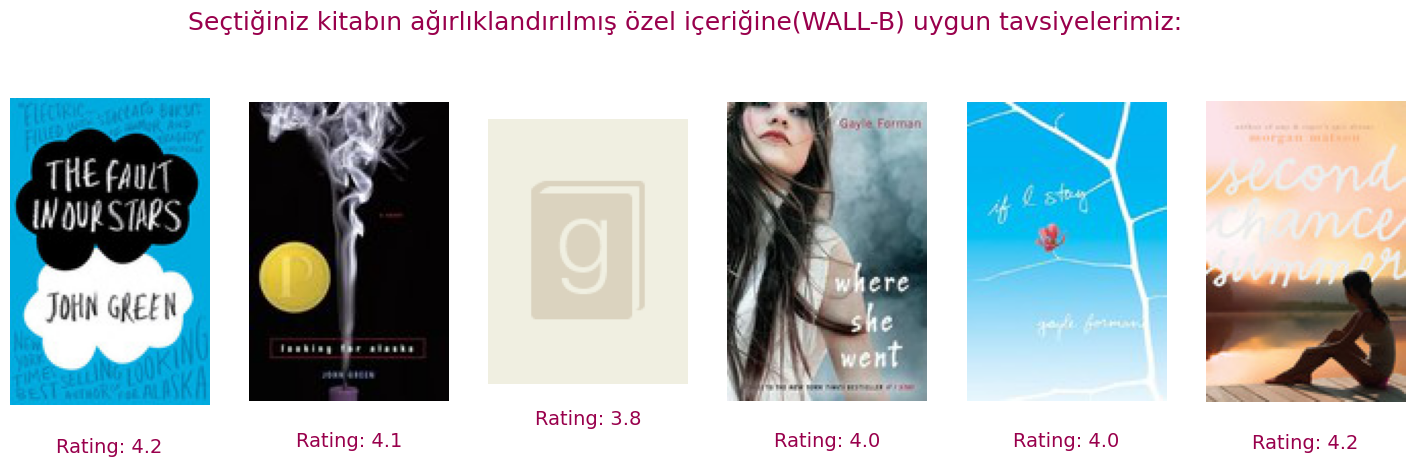

In [212]:
import matplotlib.pyplot as plt
from PIL import Image
import requests



fig, axs = plt.subplots(1, 6,figsize=(18,5))
fig.suptitle('Seçtiğiniz kitabın ağırlıklandırılmış özel içeriğine(WALL-B) uygun tavsiyelerimiz:', color="#99004C", size = 18)
for i in range(6):
        
                url = df.loc[df['book_title'] == df_Recommended_wb_all['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Rating: {}'.format(round(df[df['book_title'] == df_Recommended_wb_all['book_title'].tolist()[i]]['book_rating'].mean(),1)),
                             y=-0.18,
                                 color="#99004C",
                                 fontsize=14)
fig.show()
